In [1]:
import sys 
sys.path.append('..')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import mstats

In [11]:
min_temp = pd.read_excel('../input/MinClimate.xlsx', sheet_name='Temp')
min_prec = pd.read_excel('../input/MinClimate.xlsx', sheet_name='Prec')
a_classified = pd.read_excel('../input/quotient_deviation_df_A_CLASSIFIED.xlsx')
b_classified = pd.read_excel('../input/quotient_deviation_df_B_CLASSIFIED_FIXED.xlsx')
scale_table = pd.read_excel('../output/to_send/005/scale_table.xlsx')

In [106]:
precs = pd.DataFrame(min_prec[min_prec['Month']<11][min_prec['Month']>7].sum()[2:], columns=['PREC'])
precs['Year'] = precs.index
precs = precs.reset_index(drop=True)

C:\Users\8FEE~1\AppData\Local\Temp/ipykernel_12256/3367541355.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  precs = pd.DataFrame(min_prec[min_prec['Month']<11][min_prec['Month']>7].sum()[2:], columns=['PREC'])


In [107]:
precs['Year'] = range(1916, 2019)

In [108]:
scale_table_apn_precs = scale_table.merge(precs, on='Year', how='left')

In [109]:
c1 = scale_table_apn_precs[scale_table_apn_precs['Class 4']==1]
c2 = scale_table_apn_precs[scale_table_apn_precs['Class 4']==2]
c3 = scale_table_apn_precs[scale_table_apn_precs['Class 4']==3]
c4 = scale_table_apn_precs[scale_table_apn_precs['Class 4']==4]

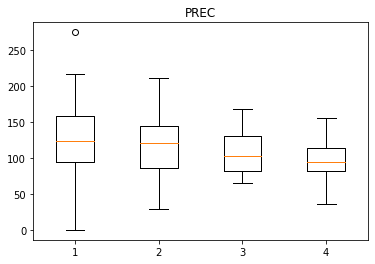

In [110]:
plt.boxplot([c1['PREC'].dropna(), c2['PREC'].dropna(), c3['PREC'].dropna(), c4['PREC'].dropna()])
plt.title('PREC')
plt.show()

In [111]:
mstats.kruskalwallis(list(c1['PREC'].dropna()), list(c2['PREC'].dropna()), list(c3['PREC'].dropna()), list(c4['PREC'].dropna()))

KruskalResult(statistic=4.139642416820706, pvalue=0.2467747259567227)

# Kraskall-Walts cumulative precs from prev year

In [114]:
min_temp_M = pd.read_excel('../input/MinClimate_MODIFIED.xlsx', sheet_name='TEMP_MOD')
min_prec_M = pd.read_excel('../input/MinClimate_MODIFIED.xlsx', sheet_name='PREC_MOD')

In [157]:
mean_temp = None
sum_prec = None

for week in set(min_temp_M['Week']):

    a = min_temp_M[min_temp_M['Week'] == week].mean(skipna=True)
    a['Week'] = week
    if str(mean_temp) != 'None':
        mean_temp = mean_temp.append(pd.DataFrame(a).T)
    else:
        mean_temp = pd.DataFrame(a).T
    
    a = min_prec_M[min_prec_M['Week'] == week].sum(skipna=True)
    a['Week'] = week
    if str(sum_prec) != 'None':
        sum_prec = sum_prec.append(pd.DataFrame(a).T)
    else:
        sum_prec = pd.DataFrame(a).T

In [161]:
mean_temp = mean_temp.reset_index(drop=True).drop(columns=['Month', 'Day'])
sum_prec = sum_prec.reset_index(drop=True).drop(columns=['Month', 'Day'])

In [166]:
mean_temp.T.to_excel('../output/mean_temp.xlsx', index=True)
sum_prec.T.to_excel('../output/sum_prec.xlsx', index=True)

Отсюда всё руками переделал в файл input/MinClimateWeekly.xlsx

In [167]:
temp_weekly = pd.read_excel('../input/MinClimateWeekly.xlsx', sheet_name='MEAN_TEMP')
prec_weekly = pd.read_excel('../input/MinClimateWeekly.xlsx', sheet_name='SUM_PREC')

In [ ]:
months = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec',
    -1: 'Dec prev',
    -2: 'Nov prev',
    -3: 'Oct prev',
    -4: 'Sep prev',
    -5: 'Aug prev',
}

def get_int_diapason(num):
    if num % 1:
        if num > 0:
            return int(num), int(num)+1
        else:
            return int(num)-1, int(num) 
    else:
        return num, num

def get_month(el1, el2):
    return f'{months[el1]} - {months[el2]}' if el1 != el2 else months[el1]

weeks_to_month = dict()
for week in min_temp_M['Week']:
    
    weeks_to_month[week] = get_month(*get_int_diapason(min_temp_M[min_temp_M['Week'] == week]['Month'].mean()))

In [255]:
c1 = temp_weekly[temp_weekly['Class']==1]
c2 = temp_weekly[temp_weekly['Class']==2]
c3 = temp_weekly[temp_weekly['Class']==3]
c4 = temp_weekly[temp_weekly['Class']==4]

In [256]:
for column in temp_weekly.columns:
    if column in ['Year', 'Class']:
        continue
    kruskalwallis = mstats.kruskalwallis(list(c1[column].dropna()), list(c2[column].dropna()), list(c3[column].dropna()), list(c4[column].dropna()))
    if kruskalwallis.pvalue < 0.05:
        print(f"{weeks_to_month[column]}, {column}, S = {kruskalwallis.statistic:.2f}, p = {kruskalwallis.pvalue:.4f}")
        #plt.boxplot([c1[column].dropna(), c2[column].dropna(), c3[column].dropna(), c4[column].dropna()])
        #plt.title(column)
        #plt.show()

Mar, 10, S = 12.57, p = 0.0057
Mar, 11, S = 8.14, p = 0.0432
Nov prev, 47 EX, S = 9.80, p = 0.0204
Mar, 13, S = 8.37, p = 0.0389
Apr - May, 18, S = 14.30, p = 0.0025
May, 20, S = 8.84, p = 0.0315
Jun, 23, S = 9.53, p = 0.0230
Jul, 29, S = 8.30, p = 0.0401
Aug prev - Sep prev, 35 EX, S = 8.62, p = 0.0348
Sep prev, 39 EX, S = 8.34, p = 0.0394
Nov, 47, S = 9.82, p = 0.0202
Sep prev, 36 EX, S = 13.63, p = 0.0035
Oct prev, 42 EX, S = 8.13, p = 0.0433


In [219]:
c1 = prec_weekly[prec_weekly['Class']==1]
c2 = prec_weekly[prec_weekly['Class']==2]
c3 = prec_weekly[prec_weekly['Class']==3]
c4 = prec_weekly[prec_weekly['Class']==4]

In [254]:
for column in temp_weekly.columns:
    if column in ['Year', 'Class']:
        continue
    kruskalwallis = mstats.kruskalwallis(list(c1[column].dropna()), list(c2[column].dropna()), list(c3[column].dropna()), list(c4[column].dropna()))
    if kruskalwallis.pvalue < 0.05:
        print(f"{weeks_to_month[column]}, {column}, S = {kruskalwallis.statistic:.2f}, p = {kruskalwallis.pvalue:.4f}")
        #plt.boxplot([c1[column].dropna(), c2[column].dropna(), c3[column].dropna(), c4[column].dropna()])
        #plt.title(column)
        #plt.show()

Sep, 38, S = 9.82, p = 0.0202
Oct, 43, S = 8.53, p = 0.0363
